# 

1. debugging: `init='adapt_diag'` gives nice posteriors!
( even for singel subject, without it traces look shit!!)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op
import bambi
import arviz as az

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plot_folder = op.join(bids_folder, 'plots_and_ims', 'eyetracking')

target_folder = op.join(bids_folder, 'derivatives', 'pupil')


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from utils import get_behavior, get_data
#df_behav = get_behavior()
df_behav = get_data()
df_behav = df_behav.xs(1,0,'session').xs('symbolic',0,'format')

df_behav['log_risky_safe'] = df_behav['log(risky/safe)']


number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')


In [3]:
summarized_fixations = pd.read_csv(op.join(bids_folder,'derivatives/pupil/group_source-saccades_fixations_summary.tsv'), sep='\t')
summarized_fixations['trial_nr'] = summarized_fixations['trial'].astype(int)
summarized_fixations.set_index(['subject','trial_nr'], inplace=True)

df = df_behav.join(summarized_fixations)

df['last_saccade_risky'] = (df['last_saccade'] == 'left_option') & (df['risky_left'])


In [24]:
df['risky_duration'] = df['left_duration'].where(df['risky_left'], df['right_duration'])
df['safe_duration'] = df['right_duration'].where(df['risky_left'], df['left_duration'])

df['duration_option_difference'] = df['risky_duration'] - df['safe_duration']
df['duration_side_difference'] = df['left_duration'] - df['right_duration']

In [ ]:
# do our of VSC

model_label= '1a'

var_1 = 'last_saccade_risky'
formula = f'chose_risky ~  log_risky_safe*{var_1} +  (log_risky_safe*{var_1} | subject) ' #C(group):C({var_1})'

model = bambi.Model(formula,family='bernoulli', data=df.reset_index(),link='probit')
traces = model.fit(init='adapt_diag', target_accept=0.9, draws=1000, tune=1000)

az.to_netcdf(traces, op.join(target_folder, f'model-{model_label}_trace.netcdf'))

In [ ]:
# do our of VSC

model_label= '1b'

var_1 = 'last_saccade_risky'
formula = f'chose_risky ~  log_risky_safe*n_risky*{var_1} +  (log_risky_safe*n_risky*{var_1} | subject) ' #C(group):C({var_1})'

model = bambi.Model(formula,family='bernoulli', data=df.reset_index(),link='probit')
traces = model.fit(init='adapt_diag', target_accept=0.9, draws=1000, tune=1000)

az.to_netcdf(traces, op.join(target_folder, f'model-{model_label}_trace.netcdf'))

In [ ]:
# do our of VSC

model_label= '2a'
var_1 = 'risky_duration'

data = df.dropna(subset=[var_1])
formula = f'chose_risky ~  log_risky_safe*{var_1} +  (log_risky_safe*{var_1} | subject) ' #C(group):C({var_1})'

model = bambi.Model(formula,family='bernoulli', data=data.reset_index(),link='probit')
traces = model.fit(init='adapt_diag', target_accept=0.9, draws=1000, tune=1000)

az.to_netcdf(traces, op.join(target_folder, f'model-{model_label}_trace.netcdf'))

In [ ]:
# do our of VSC

model_label= '2b'
var_1 = 'risky_duration'
var2 = 'n_risky'

data = df.dropna(subset=[var_1])
formula = f'chose_risky ~  log_risky_safe*{var2}*{var_1} +  (log_risky_safe*{var2}*{var_1} | subject) ' #C(group):C({var_1})'

model = bambi.Model(formula,family='bernoulli', data=data.reset_index(),link='probit')
traces = model.fit(init='adapt_diag', target_accept=0.9, draws=1000, tune=1000)

az.to_netcdf(traces, op.join(target_folder, f'model-{model_label}_trace.netcdf'))

In [ ]:
# do our of VSC

model_label= '2bb'
var_1 = 'risky_duration'
var2 = 'n_safe'

data = df.dropna(subset=[var_1])
formula = f'chose_risky ~  log_risky_safe*{var2}*{var_1} +  (log_risky_safe*{var2}*{var_1} | subject) ' #C(group):C({var_1})'

model = bambi.Model(formula,family='bernoulli', data=data.reset_index(),link='probit')
traces = model.fit(init='adapt_diag', target_accept=0.9, draws=1000, tune=1000)

az.to_netcdf(traces, op.join(target_folder, f'model-{model_label}_trace.netcdf'))

In [ ]:
## left:

model = 2
formula = f'chose_risky ~ 1 + log_risky + log_safe +  (1 + log_risky + log_safe |subject) ' #  log_risky:group - log_safe:group 
model = 3
formula = f'chose_risky ~ 1 + log_risky + log_risky:risky_duration + log_safe + log_safe:risky_duration + (1+ log_risky + log_safe + risky_duration + safe_duration | subject) ' #C(group):C({var_1})'

# Z-score durations within subjects
# relate beta ratios (b1/b1+b2 - accounting for general size) deviation from 0.5 to subwise gaze_patterns

In [ ]:
# simpel model, no eyetrack data
model_label= '1c'

formula = f'chose_risky ~  1 + log_risky_safe + n_risky +  (1 + log_risky_safe + n_risky | subject) ' #C(group):C({var_1})'
model = bambi.Model(formula,family='bernoulli', data=df_behav.reset_index(),link='probit')
traces = model.fit(init='adapt_diag', target_accept=0.9, draws=1000, tune=1000)

az.to_netcdf(traces, op.join(target_folder, f'model-{model_label}_trace.netcdf'))


### Load in and plot

In [27]:
import arviz as az

model_label= '2a'
target_folder = op.join(bids_folder, 'derivatives', 'pupil')
traces = az.from_netcdf(op.join(target_folder, f'model-{model_label}_trace.netcdf'))

#az.plot_trace(trace) # yess finally looks good!


2a


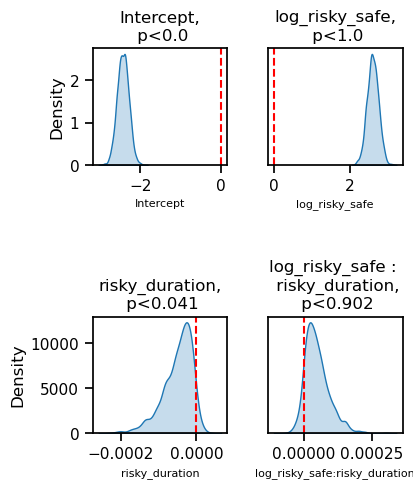

In [28]:
print(model_label)
sns.set_context('notebook')

variable_names = list(traces.posterior.data_vars.keys())  # variable_names = list(traces.posterior.data_vars.keys()) 
variable_names = [x for x in variable_names if 'subject' not in x] # remove sd

n_rows = int(len(variable_names) / 2 )
fig, axs = plt.subplots(n_rows,2, figsize=(4,n_rows*2.5), sharex=False)

for i in range(n_rows):
    for j in range(2): # intercept & slope 
        index = i * 2 + j
        var = variable_names[index] # goes till 7/8
        temp = traces.posterior[var].to_dataframe()
        count_greater_zero = np.round(np.mean(temp[var] > 0),3)
        sns.kdeplot(temp, ax=axs[i, j],legend=False, fill=True)
        if j!= 0:
            axs[i, j].set(yticks=[],ylabel='')
        axs[i, j].axvline(x=0, color='r', linestyle='--')
        axs[i, j].set_xlabel(var, fontsize=8)

        if len(var) > 20:
            var_split = var.split(':')
            #var =  f'{var_split[0]} : \n {var_split[1]}'
            var = ' : \n '.join(var_split)
        axs[i, j].set_title(f'{var},\n p<{count_greater_zero}')
        #print(f'{var}: mean={temp[var].mean()}, 95%CI={np.percentile(temp[var], [2.5, 97.5])}')

fig.subplots_adjust(wspace=0.3, hspace=1.3)
#plt.savefig(op.join(plot_folder, f'rnp_model-{model_label}_format-{format}_regressors.pdf'))

## Singel subject for fast fit 

In [ ]:
sub = 1
model_label = f'try_sub-{sub}'

df = df_behav.xs(sub,0,'subject')
df['log_risky_safe'] = df['log(risky/safe)']

import bambi
model = bambi.Model('chose_risky ~ log_risky_safe*n_risky ', link='probit', family='bernoulli', data=df.reset_index())

traces = model.fit(target_accept=0.9, draws=1000, tune=1000) # init='adapt_diag', 

import arviz as az
az.to_netcdf(traces, op.join(target_folder, f'model-{model_label}_trace.netcdf'))

#model = bambi.Model(formula,family='bernoulli', data=df.reset_index(),link='probit')
#res = model.fit(draws=1000, chains=2, tune=1000, target_accept=0.95)

array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'log_risky_safe'}>,
        <AxesSubplot: title={'center': 'log_risky_safe'}>],
       [<AxesSubplot: title={'center': 'n_risky'}>,
        <AxesSubplot: title={'center': 'n_risky'}>],
       [<AxesSubplot: title={'center': 'log_risky_safe:n_risky'}>,
        <AxesSubplot: title={'center': 'log_risky_safe:n_risky'}>]],
      dtype=object)

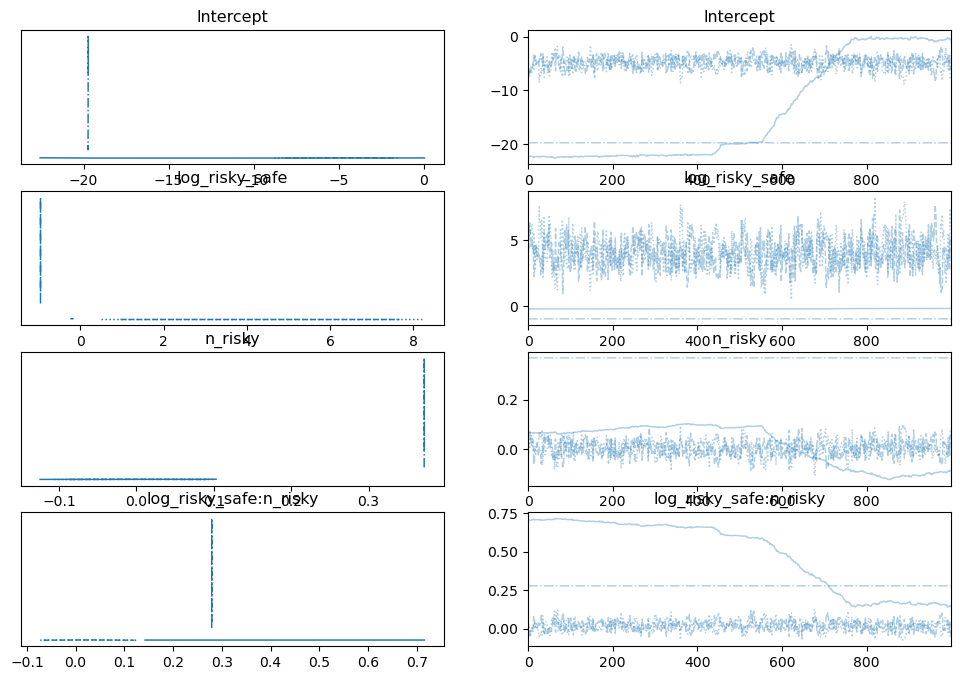

In [16]:
sub = 1

model_label = f'try_sub-{sub}'
trace = az.from_netcdf(op.join(target_folder, f'model-{model_label}_trace.netcdf'))
az.plot_trace(trace)

# Old risky choice bambi models that worked?

In [3]:
target_folder = op.join(bids_folder, 'derivatives', 'cogmodels_risk')


model_label = '2rem1' #2 # '1rem1' #3  '2rem1' 
format = 'symbolic' # 'non-symbolic' # 'symbolic' 

traces = az.from_netcdf( op.join(target_folder, f'rnp_model-{model_label}_format-{format}_trace.netcdf'))


array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'x'}>],
       [<AxesSubplot: title={'center': 'group'}>,
        <AxesSubplot: title={'center': 'group'}>],
       [<AxesSubplot: title={'center': 'x:group'}>,
        <AxesSubplot: title={'center': 'x:group'}>],
       [<AxesSubplot: title={'center': 'n_safe'}>,
        <AxesSubplot: title={'center': 'n_safe'}>],
       [<AxesSubplot: title={'center': 'x:n_safe'}>,
        <AxesSubplot: title={'center': 'x:n_safe'}>],
       [<AxesSubplot: title={'center': 'group:n_safe'}>,
        <AxesSubplot: title={'center': 'group:n_safe'}>],
       [<AxesSubplot: title={'center': 'x:group:n_safe'}>,
        <AxesSubplot: title={'center': 'x:group:n_safe'}>],
       [<AxesSubplot: title={'center': '1|subject_sigma'}>,
        <AxesSubplot: title={'center': '1|subject_sigma'}>],
       [<AxesSubplot: title

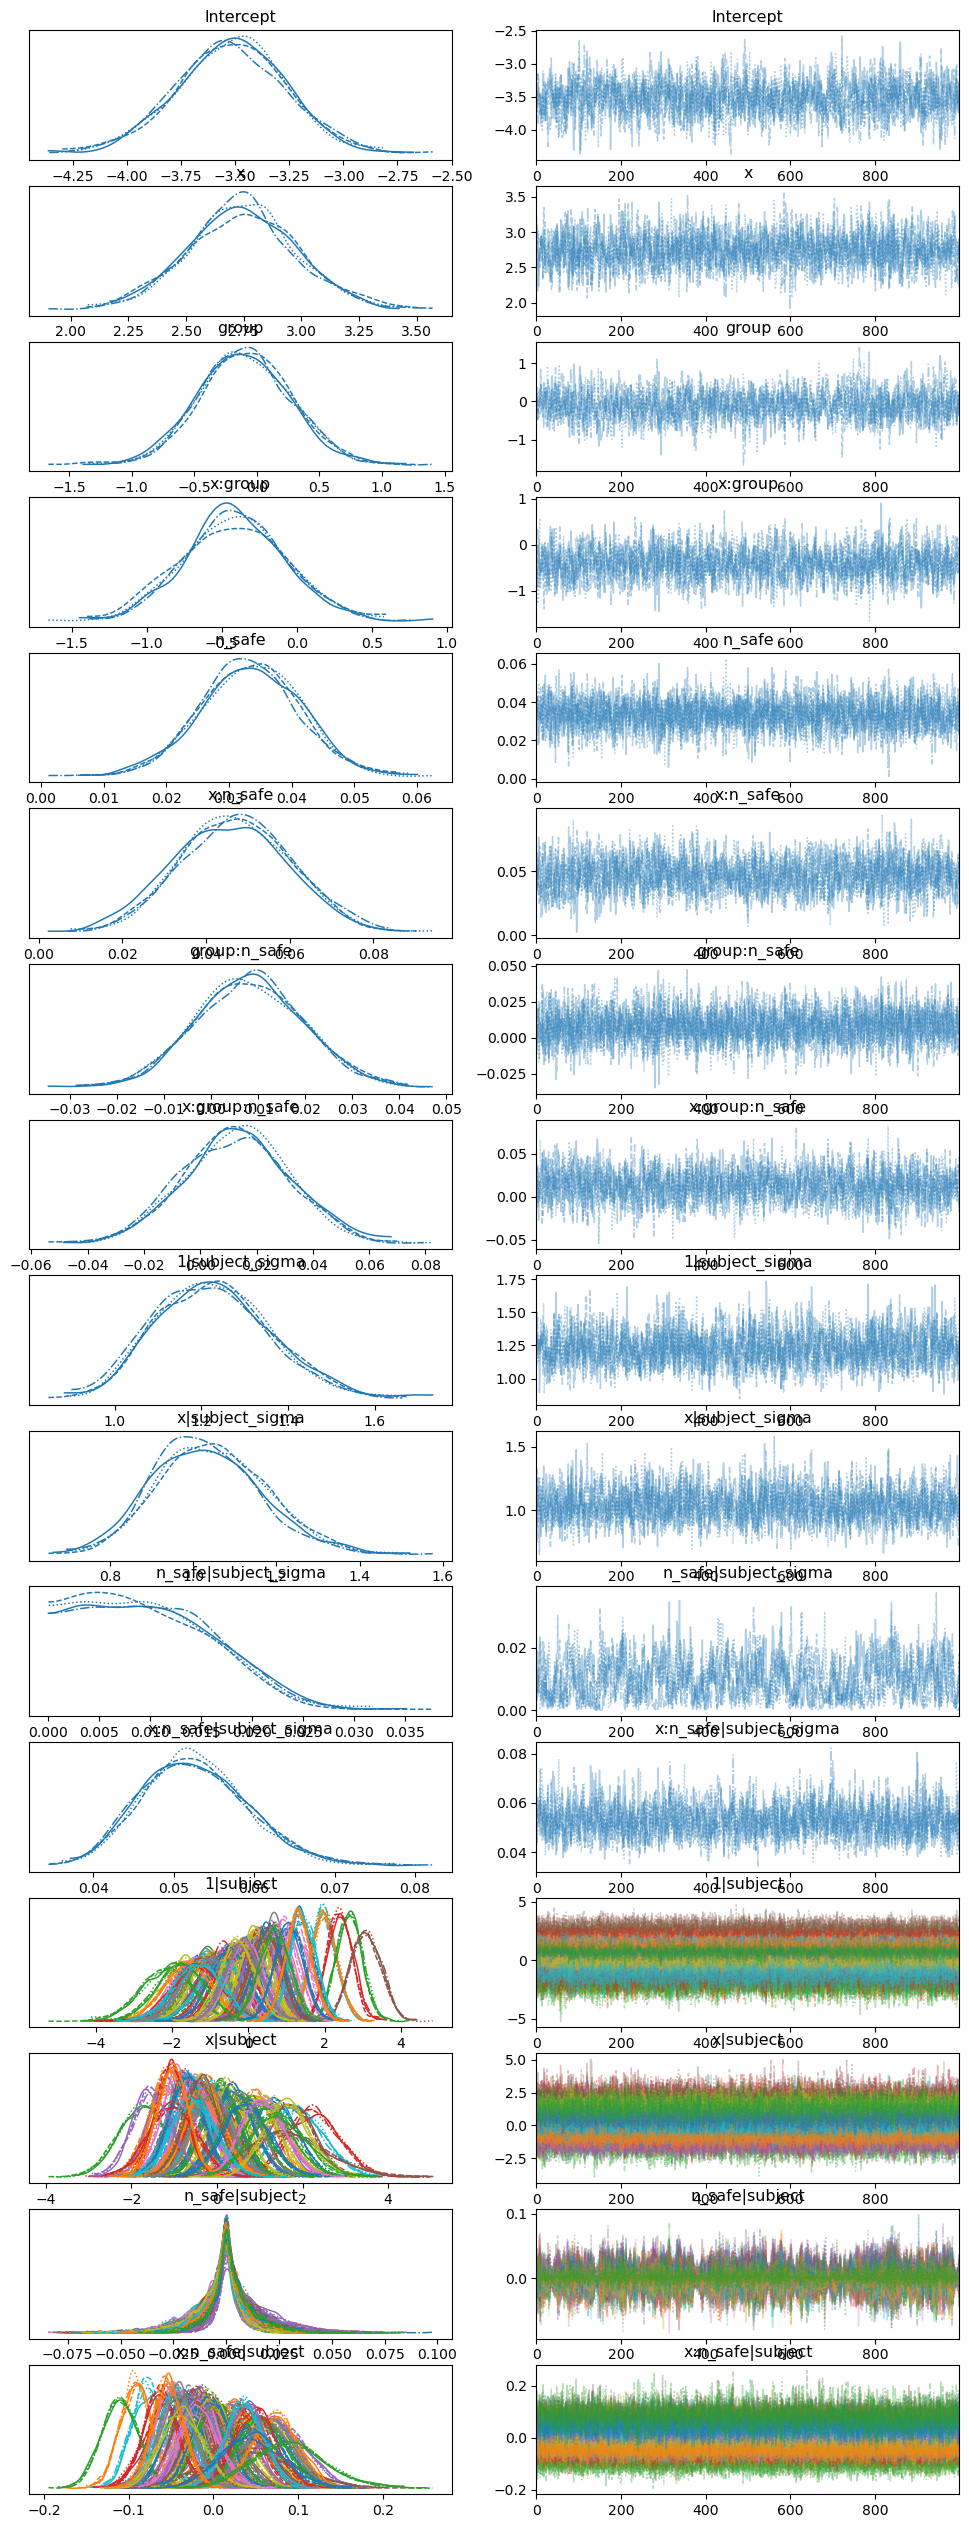

In [4]:
az.plot_trace(traces)